In [1]:
import env
import actor
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
import pandas as pd

In [2]:
path_to_data = 'train.xlsx'
environment = env.DataCenterEnv(path_to_data)
print(environment.price_values.shape)

(1096, 24)


In [3]:
df = pd.DataFrame(environment.price_values)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,...,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,38.838120,33.993558,30.053896,24.881168,23.124434,28.803768,36.652199,50.544790,56.924398,63.911743,...,58.981095,54.614881,53.981651,60.162509,67.466077,62.436697,58.464252,50.285712,50.451268,45.259334
std,21.884887,16.453507,15.947602,14.585498,14.436540,15.899613,20.775206,28.969477,30.775903,39.165093,...,39.279068,38.096263,40.691564,46.205986,75.780436,45.182318,77.865406,22.377123,20.360752,19.155459
min,0.010000,0.300000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,8.030000,1.000000,0.010000,0.010000,1.000000,10.410000,5.530000,8.360000,18.920000,16.090000
25%,25.407500,22.000000,19.007500,13.435000,11.237500,17.927500,21.977500,30.000000,34.982500,39.975000,...,37.615000,34.605000,33.602500,35.000000,36.040000,36.405000,35.905000,34.040000,35.085000,30.850000
50%,33.470000,29.465000,26.025000,21.685000,20.000000,25.725000,32.895000,43.590000,49.000000,52.715000,...,49.930000,46.850000,45.030000,49.895000,55.990000,55.825000,51.000000,43.545000,41.960000,37.395000
75%,52.850000,46.352500,40.717500,34.000000,31.942500,39.405000,52.187500,71.950000,76.775000,82.855000,...,75.000000,70.000000,69.567500,74.992500,80.792500,79.302500,73.017500,65.960000,66.465000,60.977500
max,500.000000,180.000000,200.000000,160.000000,160.000000,160.000000,150.500000,179.320000,227.130000,500.000000,...,950.000000,950.000000,950.000000,769.470000,1762.540000,1066.820000,2500.000000,300.030000,180.000000,210.100000


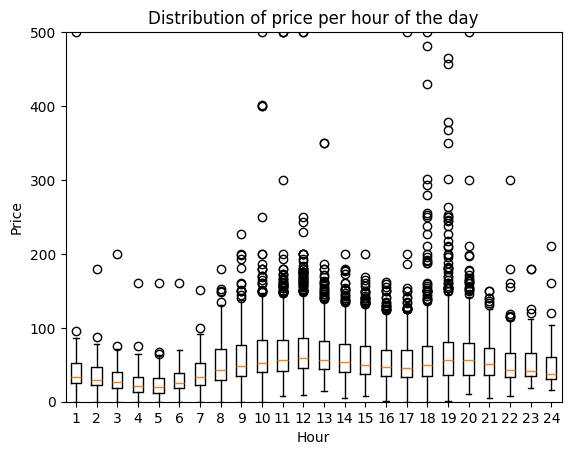

In [5]:
plt.boxplot(environment.price_values)
plt.ylim(0,500)
plt.xlabel('Hour')
plt.ylabel('Price')
plt.title('Distribution of price per hour of the day')
plt.show()

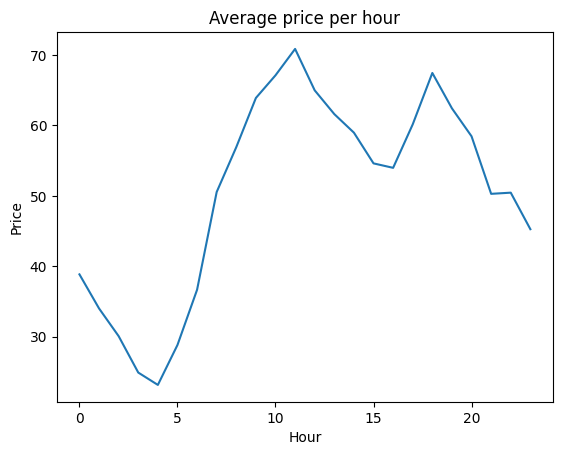

In [8]:
avg_price_per_hour = environment.price_values.mean(axis=0)
plt.plot(avg_price_per_hour)
plt.xlabel('Hour')
plt.ylabel('Price')
plt.title('Average price per hour')
plt.show()

In [20]:
data_month = {}
for i in range(len(environment.timestamps)):
    month = environment.timestamps[i].month_name()
    if month in data_month:
        data_month[month].append(environment.price_values[i].mean())
    else:
        data_month[month] = [environment.price_values[i].mean()]

for month in data_month:
    data_month[month] = np.mean(data_month[month])

print(data_month)

{'January': np.float64(53.16035394265234), 'February': np.float64(47.57212745098039), 'March': np.float64(42.72274641577061), 'April': np.float64(46.34965277777778), 'May': np.float64(46.399726702508964), 'June': np.float64(45.45369907407407), 'July': np.float64(44.88036738351254), 'August': np.float64(40.299551971326174), 'September': np.float64(54.35013425925926), 'October': np.float64(65.62487903225808), 'November': np.float64(64.73027777777777), 'December': np.float64(55.699704301075265)}


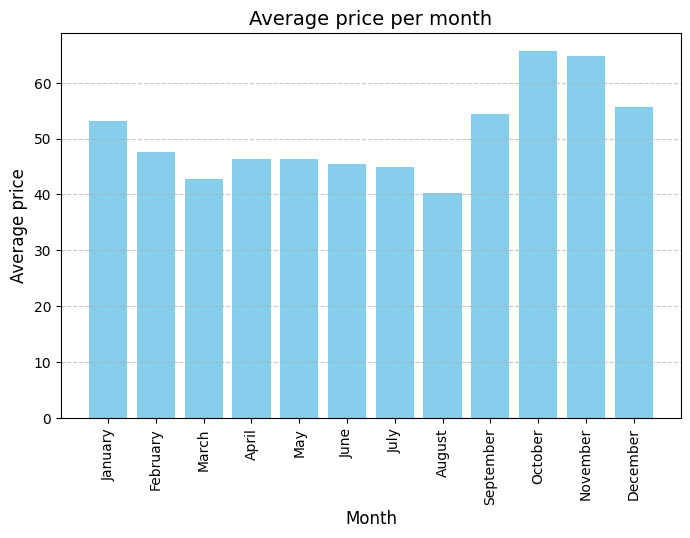

In [23]:
# Extract keys and values
x = list(data_month.keys())  # x-axis labels
y = list(data_month.values())  # y-axis values

# Create the plot
plt.figure(figsize=(8, 5))
plt.bar(x, y, color='skyblue')  # Bar chart; use plt.plot for line chart
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average price', fontsize=12)
plt.title('Average price per month', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)

# Show the plot
plt.show()